In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')

from modules.train import train_and_log
import wandb


In [2]:
device= 'cuda:1'
testing= False
project_name= "PhaseD2NN"
log_wandb = True

if testing and log_wandb:project_name='testing_to_delete'

epochs= 100
save_results_local= 10

In [3]:
if log_wandb:wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: fypteam22 (use `wandb login --relogin` to force relogin)


d2nn_exp_NEWhela_2pi@learn_type(both)@output_scale_learnable(True)


No learnable transmission coefficients
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
Learnable transmission coefficient: Amplitude and Phase
exp results dir: ../results/testing
Deleting existing directory : ../results/testing


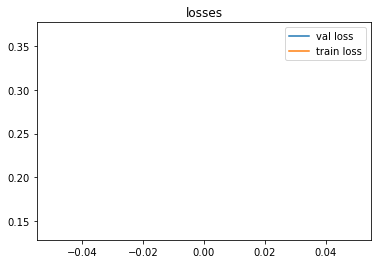

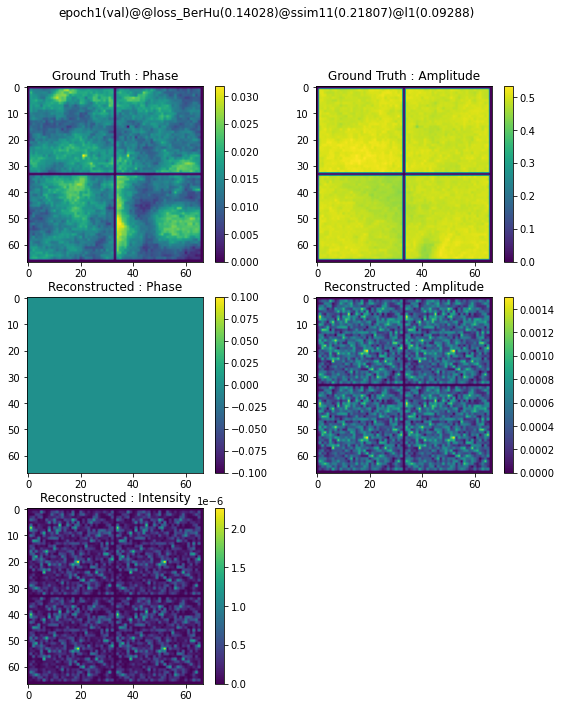

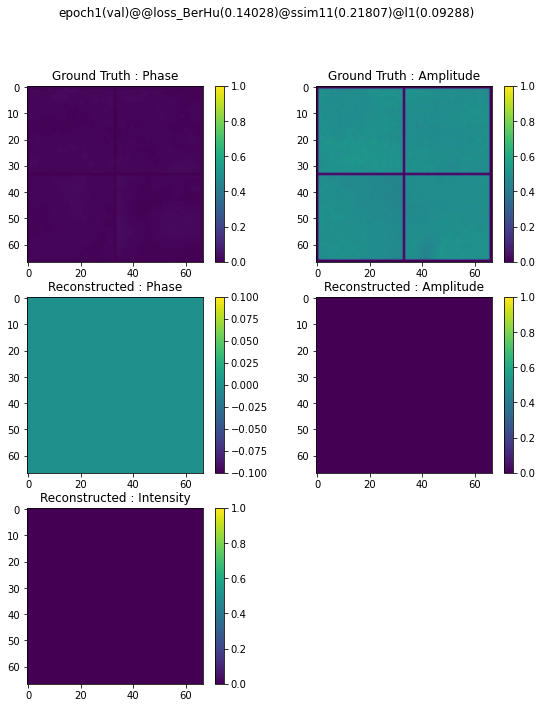

d2nn_exp_NEWhela_2pi@learn_type(both)@output_scale_learnable(False)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Problem at: <ipython-input-4-c781a7aba685> 57 <module>
Traceback (most recent call last):
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-c781a7aba685>", line 57, in <module>
    config=configs,
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/wandb_init.py", line 796, in init
    raise e
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/wandb_init.py", line 775, in init
    run = wi.init()
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/wandb_init.py", line 543, in init
    _ = backend.interface.communicate_run_start(run_obj)
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/interface/interface.py", line 801, in communicate_run_start


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-c781a7aba685>", line 57, in <module>
    config=configs,
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/wandb_init.py", line 796, in init
    raise e
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/wandb_init.py", line 775, in init
    run = wi.init()
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/wandb_init.py", line 543, in init
    _ = backend.interface.communicate_run_start(run_obj)
  File "/n/home06/udithhaputhanthri/.conda/envs/FYP_d2nn/lib/python3.6/site-packages/wandb/sdk/interface/interface.py", line 801, in communicate_run_start
    result = self._communicate(rec)
  File "/n/home06/u

In [ ]:
if testing:
    epochs= 1
    save_results_local= 1

for learn_type in ['both', 'phase']:
    for output_scale_learnable in [True, False]:

        configs = {
            'output_scale': 1.0,
            'output_scale_learnable': output_scale_learnable,

            'device': 'cuda:0',
            'model': 'd2nnASwWindow', 

            "lambda_": 6.328e-07,
            "delta_z": 3.373e-06,
            "in_dist": 3.373e-06,
            "out_dist": 5.904e-06,
            "neuron_size": 3.164e-07,    

            'img_size': 128,
            'shrink_factor': 4,
            'n_layers': 8,
            'window_size':4,
            'save_results_local':save_results_local,

            'learning_rate': 0.01,
            'epochs': epochs,
            'loss_func': 'BerHu(\'mean\',0.98).to(device)',
            'train_batch_size': 32,
            'torch_seed': 10,
            'learn_type': learn_type, 
            'unwrapped_phase': True,

            'testing': testing,
            'log_wandb' : log_wandb,

            'task_type': 'phase2intensity',

            'get_dataloaders' : 'get_qpm_np_dataloaders', #'get_qpm_np_dataloaders', 

            'angle_max': '2*np.pi', #'2*np.pi',
            'dataset_debug_opts': 'clip_phase',
        }

        configs['exp_name'] = f'd2nn_exp_NEWhela_2pi@learn_type({learn_type})@output_scale_learnable({output_scale_learnable})'

        print(configs['exp_name'])

        if testing:
            configs['exp_name'] = 'testing'
            
        if configs['log_wandb']:
            wandb.init(
                project='PhaseD2NN_reproduce', # Wandb project name
                name =configs['exp_name'], # meaningful experiment name
                config=configs,
            )
        train_and_log(configs)

if configs['log_wandb']:wandb.finish()